In [99]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import copy

In [55]:
# initial conditions

r1 = 925000 # action sphere radius
mu = 398600 # gravitational parameter
m0 = 1000 # spacecraft mass at a start point
j = 400 # specific impulse
r0 = 6371 + 400 # parking orbit radius

In [56]:
t = 1 / (3 * np.sqrt(mu)) * (r0 + r1) * np.sqrt(2 * r1 - r0)
t_days = t / (60 * 60 * 24)

teta = 2 * np.arctan(2 * r1 / r0 - 1)
v_par = np.sqrt(2 * mu / r0)
v_0 = np.sqrt(mu / r0)
v_char = v_par - v_0
v_out = v_par * r0 / r1
m = 1 - np.exp((v_0 - v_par)/(9.81 * 10**(-3) * j))
m_f = m * m0
m_k = m0 - m_f

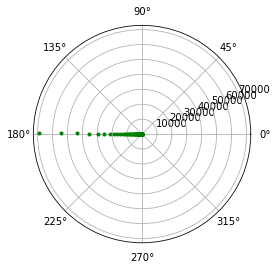

In [59]:
# setting the axes
# projection as polar
plt.axes(projection = 'polar')
  
# creating an array
# containing the radian values
rads = np.arange(0, teta, 0.001) 
  
# plotting the spiral
for rad in rads:
    r = 2 / (1 + np.cos(rad))
    plt.polar(rad, r, 'g.')
      
# display the polar plot
plt.show()

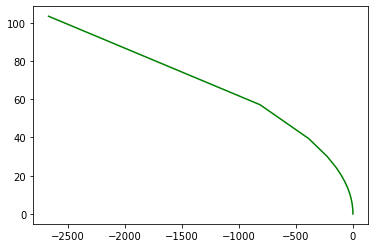

In [51]:
plt.plot(x_list, y_list, 'g')

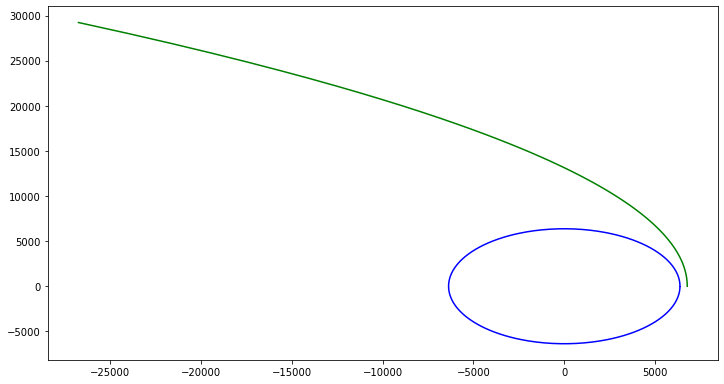

In [89]:
x_list = []
y_list = []
x_e = []
y_e = []

plt.axis('equal')

for i in range(360):
    x_e.append(6371 * np.cos(np.radians(i)))
    y_e.append(6371 * np.sin(np.radians(i)))
plt.plot(x_e, y_e, 'b')

for i in range(75):
    fi_bi = (0 + i * teta / 100)
    r_bi = 2 * 6371 / (1 + np.cos(fi_bi))
    x_list.append(r_bi * np.cos(fi_bi) + 400) 
    y_list.append(r_bi * np.sin(fi_bi))
plt.plot(x_list, y_list, 'g')

<IPython.core.display.Javascript object>


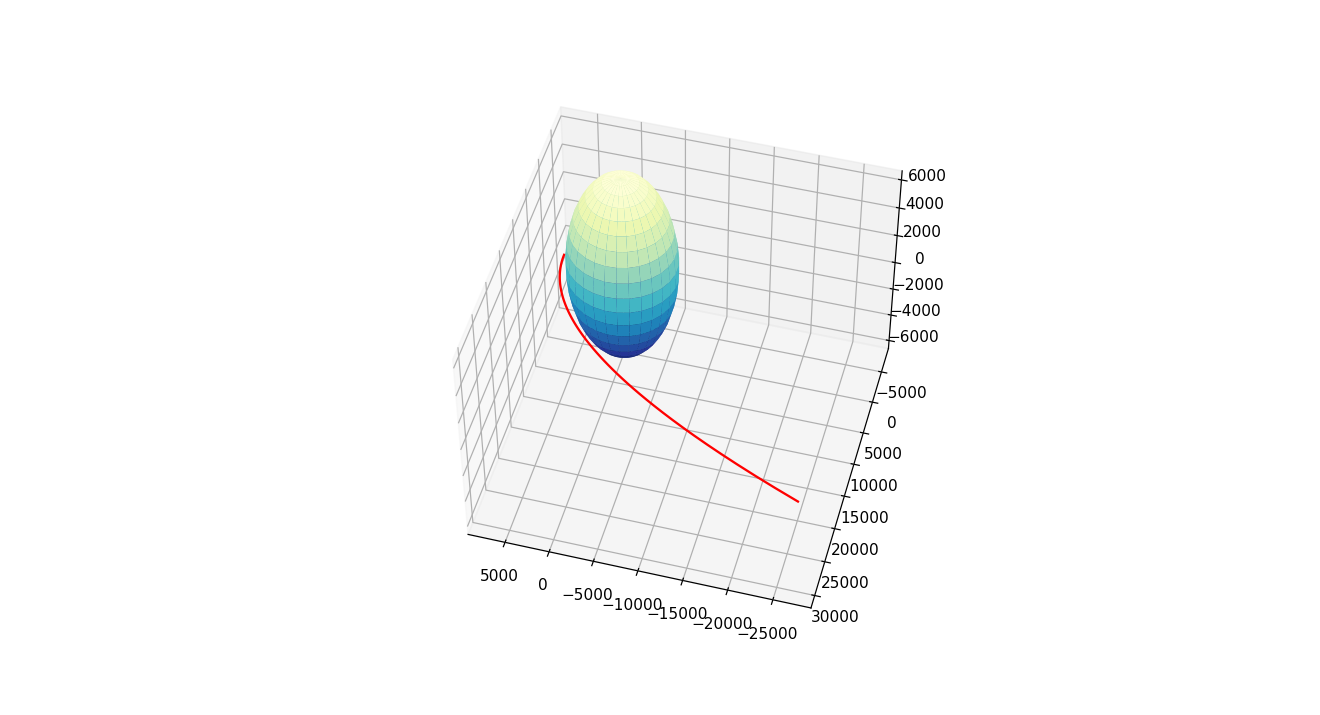

In [100]:
x_list = []
y_list = []
z_list = []

plt.rcParams["figure.figsize"] = [12.00, 6.50]
fig = plt.figure()

ax = fig.add_subplot(projection='3d')

r = 6371
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = r * np.cos(u) * np.sin(v)
y = r * np.sin(u) * np.sin(v)
z = r * np.cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)

z_list = np.full(75, 0)
for i in range(75):
    fi_bi = (0 + i * teta / 100)
    r_bi = 2 * 6371 / (1 + np.cos(fi_bi))
    x_list.append(r_bi * np.cos(fi_bi) + 400)
    y_list.append(r_bi * np.sin(fi_bi)) 
ax.plot3D(x_list, y_list, z_list, 'red')

ax.view_init(20, 100)
plt.show()